Name - Vaibhav Gupta<br/>
Roll Number - 20IE10041

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml 

In [35]:
boston = fetch_openml(name='boston', version=1,parser='auto') 

# Split the dataset into training, validation, and testing sets with ratios of 70%, 15%, and 15% respectively
X_train, X_temp, y_train, y_temp = train_test_split(boston.data, boston.target, test_size=0.3, random_state=42,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,shuffle =True)

In [36]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'max_features': [int(np.log2(X_train.shape[1]))]
}

# Set random seed 
np.random.seed(42)

# Create RandomForestRegressor model
rf_regressor = RandomForestRegressor(criterion='squared_error')

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_regressor = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best hyperparameters for Random Forest Regressor:", best_params)

# Evaluate the best model on the validation set
y_val_pred = best_rf_regressor.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error (MSE) on validation set:", val_mse)


Best hyperparameters for Random Forest Regressor: {'max_depth': 10, 'max_features': 3, 'n_estimators': 100}
Mean Squared Error (MSE) on validation set: 6.126949292417017


Mean Squared Error (MSE) on testing set: 16.344320060290453


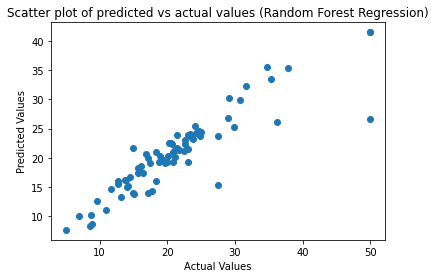

In [37]:
# Evaluate the best model on the testing set
y_test_pred = best_rf_regressor.predict(X_test)

# Calculate mean squared error (MSE) between predicted and actual target values on the testing set
test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) on testing set:", test_mse)

# Create a scatter plot visualizing the predicted target values versus the actual target values on the testing set
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter plot of predicted vs actual values (Random Forest Regression)")
plt.show()


In [38]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

# Split the dataset into training, validation, and testing sets with ratios of 70%, 15%, and 15% respectively
X_train, X_temp, y_train, y_temp = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,shuffle =True)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [77]:

class AdaBoostClassifierScratch:
    def __init__(self, n_estimators=50,random_seed=None):
        self.n_estimators = n_estimators
        self.estimators = []
        self.estimator_weights = []
        self.random_seed = random_seed
    
    def fit(self, X, y):
        np.random.seed(self.random_seed)
        
        m = X.shape[0]
        sample_weights = np.full(m, 1/m)
        
        for _ in range(self.n_estimators):
            # Fit a decision tree using weighted samples
            estimator = DecisionTreeClassifier(max_depth=3)
            estimator.fit(X, y, sample_weight=sample_weights)
            
            # Predict on training data
            y_pred = estimator.predict(X)
            
            # Calculate weighted error
            weighted_error = np.sum(sample_weights * (y_pred != y))
            
            # Calculate estimator weight
            estimator_weight = 0.5 * np.log((1 - weighted_error) / (weighted_error + 1e-10))
            
            # Update sample weights
            sample_weights *= np.exp(-estimator_weight * y * y_pred)
            sample_weights /= np.sum(sample_weights)
            
            # Save the estimator and its weight
            self.estimators.append(estimator)
            self.estimator_weights.append(estimator_weight)
    
    def predict(self, X):
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples)
        
        for estimator, estimator_weight in zip(self.estimators, self.estimator_weights):
            predictions += estimator_weight * estimator.predict(X)
        
        return np.sign(predictions)

# Hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 150]}
best_accuracy_scratch = 0
best_n_estimators_scratch = None

for n_estimators in param_grid['n_estimators']:
    adaboost_clf = AdaBoostClassifierScratch(n_estimators=n_estimators,random_seed=None)
    adaboost_clf.fit(X_train, y_train)
    
    #Evaluation on the validation set
    y_pred_scratch = adaboost_clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_scratch)
    print(f"Number of estimators: {n_estimators}, Validation Accuracy: {accuracy}")
    
    if accuracy > best_accuracy_scratch:
        best_accuracy_scratch = accuracy
        best_n_estimators_scratch = n_estimators


Number of estimators: 50, Validation Accuracy: 0.9176470588235294
Number of estimators: 100, Validation Accuracy: 0.8941176470588236
Number of estimators: 150, Validation Accuracy: 0.9058823529411765


In [78]:
print("Best number of weak learners:", best_n_estimators_scratch)

print("Best Accuracy on validation set:", best_accuracy_scratch)

Best number of weak learners: 50
Best Accuracy on validation set: 0.9176470588235294


In [79]:
from sklearn.metrics import classification_report, confusion_matrix

# Perform inference using the best model on the test set
y_test_pred_scratch = adaboost_clf.predict(X_test)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_scratch))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_scratch))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        26
           1       0.91      1.00      0.95        60

    accuracy                           0.93        86
   macro avg       0.95      0.88      0.91        86
weighted avg       0.94      0.93      0.93        86

Confusion Matrix:
[[20  6]
 [ 0 60]]


In [86]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150]
}

np.random.seed(None)
# Create AdaBoost Classifier using sklearn's implementation
sklearn_ada_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

# Perform hyperparameter tuning using GridSearchCV
sklearn_grid_search = GridSearchCV(sklearn_ada_classifier, param_grid, cv=3, scoring='accuracy')
sklearn_grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_sklearn_ada_classifier = sklearn_grid_search.best_estimator_
best_params_sklearn = sklearn_grid_search.best_params_
print("Best hyperparameters for sklearn's AdaBoost Classifier:", best_params_sklearn)


# Evaluate the best model on the validation set
y_val_pred_sklearn = best_sklearn_ada_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred_sklearn)
print("Accuracy on validation set:", val_accuracy)

# Evaluate the best model on the test set using sklearn's implementation
y_test_pred_sklearn = best_sklearn_ada_classifier.predict(X_test)

# Generate a classification report and confusion matrix for sklearn's AdaBoost Classifier
print("Classification Report (sklearn's AdaBoost Classifier):")
print(classification_report(y_test, y_test_pred_sklearn))
print("Confusion Matrix (sklearn's AdaBoost Classifier):")
print(confusion_matrix(y_test, y_test_pred_sklearn))



Best hyperparameters for sklearn's AdaBoost Classifier: {'n_estimators': 100}
Accuracy on validation set: 0.9764705882352941
Classification Report (sklearn's AdaBoost Classifier):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.98      0.99        60

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86

Confusion Matrix (sklearn's AdaBoost Classifier):
[[26  0]
 [ 1 59]]


In [87]:
# Compare with custom implementation
print("Comparison with custom implementation:")

print("Custom implementation - Best hyperparameters:", best_n_estimators_scratch)
print("Accuracy on validation set", best_accuracy_scratch)
print("Custom implementation - Classification Report:")
print(classification_report(y_test, y_test_pred_scratch))
print("Custom implementation - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_scratch))

Comparison with custom implementation:
Custom implementation - Best hyperparameters: 50
Accuracy on validation set 0.9176470588235294
Custom implementation - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        26
           1       0.91      1.00      0.95        60

    accuracy                           0.93        86
   macro avg       0.95      0.88      0.91        86
weighted avg       0.94      0.93      0.93        86

Custom implementation - Confusion Matrix:
[[20  6]
 [ 0 60]]
